# Guided Project: Data Analysis with Pandas

## Imported Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt 
from scipy import stats

## Step 1: Select & Import Data Set
- I went to Kaggle Data Sets and selected the [Kickstarter Projects](https://www.kaggle.com/kemical/kickstarter-projects/home) dataset. Kickstartes is one of the world's largest funding platform for creative projects and this dataset provides information of Kickstarter projects up to 2017.
- I downloaded the dataset into the your-code folder and imported it using pandas.

In [2]:
kickstarter = pd.read_csv('data-folder/ks-projects-201801.csv')
display(kickstarter.head()) 

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## Step 2:  Data Cleaning
- I started to explore the dataset using the info command to get an idea of the data types and the nulls

In [3]:
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


- I changed the data types of the following columns 
    - ID to object
    - category to category
    - main_category to category
    - state to category
    - deadline to datetime
    - launched to datetime
- I used the dtypes command to verify the data types where changed

In [4]:
kickstarter['ID'] = kickstarter['ID'].astype('object')
kickstarter['category'] = kickstarter['category'].astype('category')
kickstarter['main_category'] = kickstarter['main_category'].astype('category')
kickstarter['state'] = kickstarter['state'].astype('category')
kickstarter['deadline'] = pd.to_datetime(kickstarter['deadline'])
kickstarter['launched'] = pd.to_datetime(kickstarter['launched'])

In [5]:
kickstarter.dtypes

ID                          object
name                        object
category                  category
main_category             category
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                     category
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

- I proceded to dropp the usd pledged column for two main reasons
   - The first was that it was missing values since but inreality they represented an insignificant portion of the data set
   - The second was that usd_pledged was the conversion to US dollars of the pledged column done by kickstarter, while the usd_pleadged_real column had the conversion by Fixer.io API which is in is the correct to use for analysis since it matched the usd_goal_real rate.

In [27]:
null_cols = kickstarter.isnull().sum()
drop_cols = list(null_cols[null_cols > 100].index)
kickstarter = kickstarter.drop(drop_cols, axis=1)

## Step 3: Preliminary Analysis

- I started the preliminary analysis using the describe command
- I as well created a boxplot and a histogram
    - I didn't find any of these anylists tools very usefull due to the type of data

In [28]:
kickstarter.describe()

,goal,pledged,backers,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.786610e+05,3.786610e+05
mean,4.908079e+04,9.682979e+03,105.617476,9.058924e+03,4.545440e+04
std,1.183391e+06,9.563601e+04,907.185035,9.097334e+04,1.152950e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,2.000000,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,12.000000,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,56.000000,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,1.663614e+08


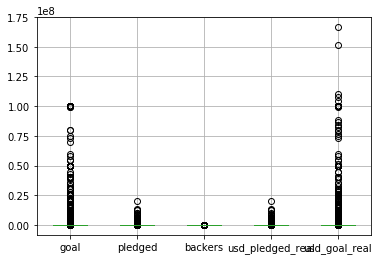

In [30]:
kickstarter.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1185237b8>,
      dtype=object)

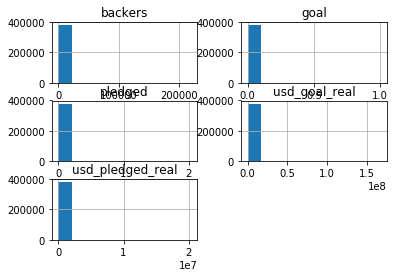

In [31]:
kickstarter.hist()

## Step 4: Correlation Analysis
- Because of the nature of the data, from the begining I was interested in finding correlations within the variables. 
- The first question I wanted to ask  was whether there was a relationship between the pledged amount, the goal amount, and the number of backers.
    - I therefore created a correlation matrix to figure out the correlations between these numerical variables.
    - From this matrix I discovered that the only strong correlation is between the number of backers and the pledged amount. 

In [34]:
kickstarter.corr()

,goal,pledged,backers,usd_pledged_real,usd_goal_real
goal,1.000000,0.007358,0.004012,0.005104,0.942692
pledged,0.007358,1.000000,0.717079,0.952843,0.005024
backers,0.004012,0.717079,1.000000,0.752539,0.004517
usd_pledged_real,0.005104,0.952843,0.752539,1.000000,0.005596
usd_goal_real,0.942692,0.005024,0.004517,0.005596,1.000000



Perform Preliminary Analysis - use functions like describe to help uncover interesting insights about your dataset.
Use the tools in your tool kit - Using tools like calculated columns and pivot tables, discover and desribe the insights you have found.
Consult documentation and resources provided to better understand the tools you are using and how to accomplish what you want.

Some of the questions I wanted to answer include:
   - The impact of the project's category in amount of money pledged
   - Success rates of projects depending on the category
   - Amount pledged with status 
- I 

In [29]:
kickstarter.pivot_table(index=['main_category'],values=['usd_goal_real','usd_pledged_real'])

,usd_goal_real,usd_pledged_real
main_category,,
Art,39198.575879,3220.986968
Comics,19571.430669,6610.443828
Crafts,10434.466228,1632.907282
Dance,9588.328548,3452.946356
Design,41871.388591,24417.034698
Fashion,22412.409361,5712.450839
Film & Video,82625.292254,6157.978427
Food,49039.620804,5113.669716
Games,44923.741408,21041.903140


In [36]:
kickstarter.pivot_table(index=['main_category'],columns=['state'],values=['ID'])

ID                                            \
state              canceled        failed          live    successful   
main_category                                                           
Art            1.097045e+09  1.071770e+09  1.147005e+09  1.079846e+09   
Comics         1.084159e+09  1.066217e+09  9.723505e+08  1.059403e+09   
Crafts         1.104318e+09  1.075722e+09  1.007641e+09  1.077424e+09   
Dance          1.067723e+09  1.066526e+09  1.054220e+09  1.079357e+09   
Design         1.071301e+09  1.078069e+09  1.114504e+09  1.079661e+09   
Fashion        1.073428e+09  1.070605e+09  1.048983e+09  1.064358e+09   
Film & Video   1.081212e+09  1.074400e+09  1.105737e+09  1.072990e+09   
Food           1.077269e+09  1.084114e+09  1.040872e+09  1.077941e+09   
Games          1.070053e+09  1.070303e+09  1.044611e+09  1.075683e+09   
Journalism     1.079068e+09  1.072495e+09  1.023091e+09  1.085346e+09   
Music          1.077491e+09  1.074225e+09  1.097872e+09  1.074948e+09   
Photography    1.067815e+09  1.071986e+09  1.077304e+09  1.071967e+09   
Publishing     1.086909e+09  1.073605e+09  1.148000e+09  1.079333e+09   
Technology     1.056191e+09  1.078507e+09  1.066044e+09  1.059648e+09   
Theater        1.097766e+09  1.071271e+09  1.103280e+09  1.063860e+09   

                                           
state             suspended     undefined  
main_category                              
Art            1.131164e+09           NaN  
Comics         1.224591e+09           NaN  
Crafts         1.105994e+09           NaN  
Dance          1.298578e+09  1.704012e+09  
Design         1.104854e+09  1.343584e+09  
Fashion        1.160050e+09  9.521368e+08  
Film & Video   9.995792e+08  1.107768e+09  
Food           1.123618e+09           NaN  
Games          1.096973e+09  1.098355e+09  
Journalism     1.138458e+09           NaN  
Music          1.075541e+09  1.076395e+09  
Photography    1.049919e+09  1.841517e+09  
Publishing     9.935939e+08  1.081030e+09  
Technology     1.083382e+09  1.351330e+09  
Theater        1.023593e+09  1.189638e+09

In [46]:
kickstarter.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [54]:
kickstarter.loc[:,'goal','pledged', 'backers', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']

IndexingError: Too many indexers